<a href="https://colab.research.google.com/github/KauaHenSilva/python_neural_networks_for_image_classification/blob/main/python_neural_networks_for_image_classification_extractor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [39]:
import requests
import os
import zipfile
import shutil

In [40]:
def download_large_file_from_google_drive(file_id, destination):
    base_url = "https://drive.google.com/uc?export=download"

    with requests.Session() as session:
        response = session.get(base_url, params={'id': file_id}, stream=True)
        for key, value in response.cookies.items():
            if key.startswith('download_warning'):
                confirm_token = value
                break
        else:
            confirm_token = None

        if confirm_token:
            params = {'id': file_id, 'confirm': confirm_token}
            response = session.get(base_url, params=params, stream=True)

        # Escrever o conteúdo do arquivo no destino
        with open(destination, 'wb') as f:
            for chunk in response.iter_content(32768):
                f.write(chunk)

download_large_file_from_google_drive('1j5ZM-csz4Ue6xBJPcztfJ-z7Fc6eu82n', 'homer_bart.zip')

In [41]:
if not os.path.exists('homer_bart'):
    with zipfile.ZipFile('homer_bart.zip', 'r') as zip_ref:
        zip_ref.extractall('homer_bart_temp')

    os.remove('homer_bart.zip')
    shutil.move('homer_bart_temp/homer_bart_1', 'homer_bart')
    shutil.rmtree('homer_bart_temp')

# Pré tratamento

In [42]:
import cv2
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab.patches import cv2_imshow

In [43]:
paths_datas = [os.path.join('./homer_bart', x) for x in sorted(os.listdir('homer_bart/'))]
paths_datas = paths_datas[1:]

In [44]:
export = 'boca,calca,sapato,camisa,calcao,tenis,classes\n'
sizeH, sizeW = 224, 224
mostrar_imagem = False
caracteristicas = []

In [73]:
imagens = []
classes = []

for path in paths_datas:
        try:
              imagem = cv2.imread(path)
              imagem = cv2.resize(imagem, (sizeH, sizeW))
              imagens.append(imagem)
        except:
            continue

        imagem_alterada = imagem.copy()
        imagem_caracteristicas = []

        boca = 0
        calca = 0
        sapato = 0
        camisa = 0
        calcao = 0
        tenis = 0

        name_img = os.path.basename(path)

        if name_img.startswith('bart'):
            classe = 0
        else:
            classe = 1


        for altura in range(0, sizeH):
            for largura in range(0, sizeW):
                # RGB -> BGR
                azul = imagem_alterada.item(altura, largura, 0)
                verde = imagem_alterada.item(altura, largura, 1)
                vermelho = imagem_alterada.item(altura, largura, 2)

                # Homer - marrom boca
                if (azul >= 95 and azul <= 140) and (verde >= 160 and verde <= 185) and (vermelho >= 175 and vermelho <= 205):
                    imagem_alterada[altura, largura] = [0, 255, 255]
                    boca += 1

                # Homer - azul calca
                if (azul >= 150 and azul <= 180) and (verde >= 98 and verde <= 120) and (vermelho >= 0 and vermelho <= 90):
                    imagem_alterada[altura, largura] = [0, 255, 255]
                    calca += 1

                # Homer - cinza sapato
                if altura > sizeH /2:
                  if (azul >= 25 and azul <= 45) and (verde >= 25 and verde <= 45) and (vermelho >= 25 and vermelho <= 45):
                      imagem_alterada[altura, largura] = [0, 255, 255]
                      sapato += 1

                # Bart - laranja da camisa
                if (azul >= 11 and azul <= 50 and verde >= 85 and verde <= 105 and vermelho >= 240 and vermelho <= 255):
                  imagem_alterada[altura, largura] = [0, 255, 128]
                  camisa += 1

                # Bart - azul do calção
                if (azul >= 125 and azul <= 170 and verde >= 0 and verde <= 12 and vermelho >= 0 and vermelho <= 20):
                  imagem_alterada[altura, largura] = [0, 255, 128]
                  calcao += 1

                # Bart - azul do tênis
                if altura > (sizeH / 2):
                  if (azul >= 125 and azul <= 170 and verde >= 0 and verde <= 12 and vermelho >= 0 and vermelho <= 20):
                    imagem_alterada[altura, largura] = [0, 255, 128]
                    tenis += 1


        boca = round((boca / (sizeH * sizeW)) * 100, 9)
        calca = round((calca / (sizeH * sizeW)) * 100, 9)
        sapato = round((sapato / (sizeH * sizeW)) * 100, 9)
        camisa = round((camisa / (sizeH * sizeW)) * 100, 9)
        calcao = round((calcao / (sizeH * sizeW)) * 100, 9)
        tenis = round((tenis / (sizeH * sizeW)) * 100, 9)

        imagem_caracteristicas.append(boca)
        imagem_caracteristicas.append(calca)
        imagem_caracteristicas.append(sapato)
        imagem_caracteristicas.append(camisa)
        imagem_caracteristicas.append(calcao)
        imagem_caracteristicas.append(tenis)
        imagem_caracteristicas.append(classe)

        caracteristicas.append(imagem_caracteristicas)

        f = (','.join([str(x) for x in imagem_caracteristicas]))
        export += f'{f}\n'

        if mostrar_imagem:
            imagem_alterada = cv2.cvtColor(imagem_alterada, cv2.COLOR_BGR2RGB)
            imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
            figure, ax = plt.subplots(1, 2)
            ax[0].imshow(imagem)
            ax[1].imshow(imagem_alterada)
            plt.show()

In [46]:
with open('caracteristicas.csv', 'w') as f:
    f.write(export)


In [47]:
pd_caracteristicas = pd.read_csv('caracteristicas.csv')
pd_caracteristicas

,boca,calca,sapato,camisa,calcao,tenis,classes
0,0.000000,0.000000,0.259088,6.698422,3.336256,3.336256,0
1,0.000000,0.000000,0.177376,4.880820,3.061224,3.061224,0
2,0.000000,0.000000,0.181362,5.113999,4.920679,4.920679,0
3,0.000000,0.532127,0.153460,0.000000,0.000000,0.000000,0
4,0.000000,0.000000,0.161432,8.793048,3.380102,3.380102,0
...,...,...,...,...,...,...,...
264,6.357621,0.000000,0.261081,0.000000,0.000000,0.000000,1
265,0.000000,0.000000,0.251116,0.000000,0.000000,0.000000,1
266,4.069675,0.000000,0.581952,0.000000,0.000000,0.000000,1
267,1.379145,0.000000,0.089684,0.000000,0.000000,0.000000,1


# Base de treinamento e teste

In [48]:
X = pd_caracteristicas.iloc[:, 0:6].values
y = pd_caracteristicas.iloc[:, 6].values

In [49]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 1)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((215, 6), (215,), (54, 6), (54,))

# Construção e treinamento da rede neural

In [50]:
qtd_classes = len(np.unique(y))
qtd_caracteristicas = X.shape[1]

In [51]:
my_units = int((qtd_caracteristicas + qtd_classes) / 2)
my_units

4

In [52]:
# 6 -> 4 -> 4 -> 4 -> 1

network = tf.keras.models.Sequential()
network.add(tf.keras.layers.Dense(units=my_units, activation='relu', input_shape=(qtd_caracteristicas,)))
network.add(tf.keras.layers.Dense(units=my_units, activation='relu'))
network.add(tf.keras.layers.Dense(units=my_units, activation='relu'))
network.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
network.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 4)                   │              28 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 73 (292.00 B)

 Trainable params: 73 (292.00 B)

 Non-trainable params: 0 (0.00 B)

In [54]:
network.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [55]:
historico = network.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.6360 - loss: 0.6799 - val_accuracy: 0.5185 - val_loss: 0.7880
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5954 - loss: 0.6904 - val_accuracy: 0.5185 - val_loss: 0.7683
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5975 - loss: 0.6738 - val_accuracy: 0.5185 - val_loss: 0.7503
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6076 - loss: 0.6593 - val_accuracy: 0.5185 - val_loss: 0.7314
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6332 - loss: 0.6411 - val_accuracy: 0.5185 - val_loss: 0.7136
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6263 - loss: 0.6387 - val_accuracy: 0.5185 - val_loss: 0.6953
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5990 - loss: 0.6174 - val_accuracy: 0.5185 - val_loss: 0.6770
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6156 - loss: 0.5969 - val_accuracy: 0.5185 - val_loss:

# Avaliação

Text(0.5, 1.0, 'Acerto')

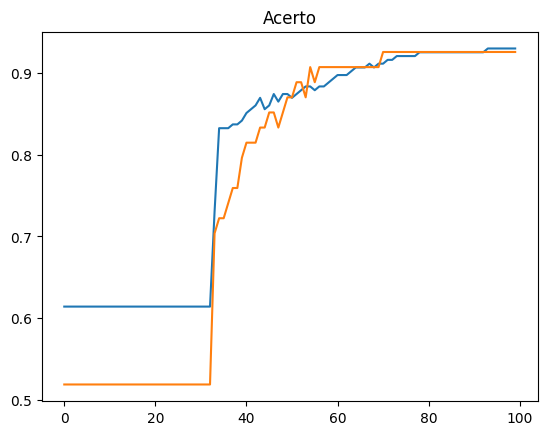

In [56]:
plt.figure()
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acerto')

Text(0.5, 1.0, 'Erro')

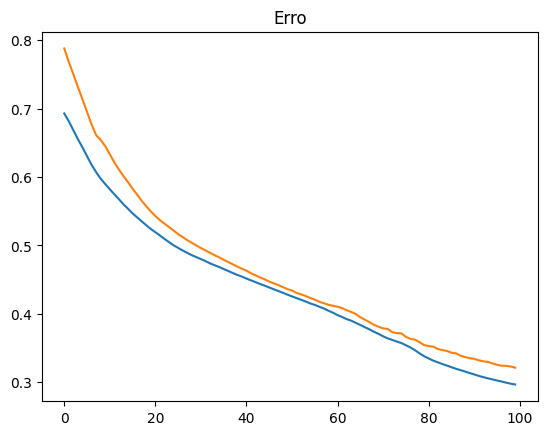

In [57]:
plt.figure()
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Erro')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


<Axes: >

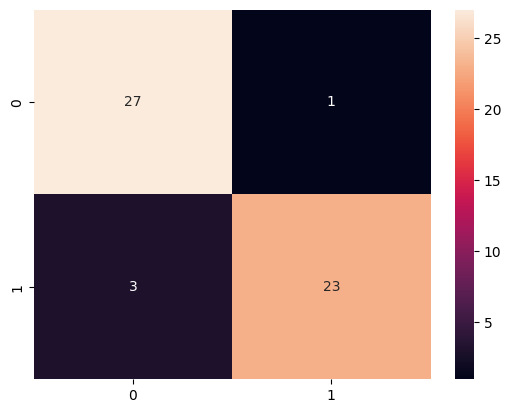

In [58]:
from sklearn.metrics import confusion_matrix

y_pred = network.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [59]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        28
           1       0.96      0.88      0.92        26

    accuracy                           0.93        54
   macro avg       0.93      0.92      0.93        54
weighted avg       0.93      0.93      0.93        54



# Salvar e carregar a rede neural

In [60]:
model_json = network.to_json()

with open('network.json', 'w') as json_file:
  json_file.write(model_json)

In [61]:
from keras.models import save_model

network_save = save_model(network, 'heights.keras')

In [62]:
with open('network.json', 'r') as json_file:
  model_json = json_file.read()

network = tf.keras.models.model_from_json(model_json)
network.load_weights('heights.keras')
network.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [63]:
network.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 4)                   │              28 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 73 (292.00 B)

 Trainable params: 73 (292.00 B)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


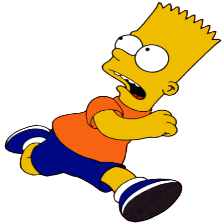

Bart


In [80]:
imagem_test = X_test[2]
imagem_test = imagem_test.reshape(1, -1)

previsao = network.predict(imagem_test)[0][0]

cv2_imshow(imagens[2])
if previsao < 0.5:
  print('Bart')
else:
  print('Homer')
